In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 5.3 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/3.0 MB 7.4 MB/s eta 0:00:01
     ---------- ----------------------------- 0.7/3.0 MB 5.9 MB/s eta 0:00:01
     ---------- ----------------------------- 0.7/3.0 MB 5

In [4]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

# Using the Ticker function to create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Using the history function to extract stock information and save it in a dataframe
tesla_data = tesla.history(period="max")

# Resetting the index and displaying the first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'  # Replace with the actual URL

# Send a GET request to the webpage
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the revenue data
table = soup.find('table')  # Modify this based on the actual HTML structure

# Extract table data into a list
data = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = [col.text.strip() for col in row.find_all('td')]
    data.append(cols)

# Create a DataFrame from the extracted data
headers = [header.text.strip() for header in table.find_all('th')]
tesla_revenue = pd.DataFrame(data, columns=headers)

# Display the last five rows of the DataFrame
print(tesla_revenue.tail())


  Fiscal Year End Revenue Change Growth
5    Dec 31, 2018     Pro    Pro    Pro
6    Dec 31, 2017     Pro    Pro    Pro
7    Dec 31, 2016     Pro    Pro    Pro
8    Dec 31, 2015     Pro    Pro    Pro
9    Dec 31, 2014     Pro    Pro    Pro


In [7]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract stock information and save it in a dataframe
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla revenue data
url = 'https://stockanalysis.com/stocks/gme/revenue/'  # Replace with the actual URL

# Send a GET request to the webpage
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the revenue data
table = soup.find('table')  # Modify this based on the actual HTML structure

# Extract table data into a list
data = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = [col.text.strip() for col in row.find_all('td')]
    data.append(cols)

# Create a DataFrame from the extracted data
headers = [header.text.strip() for header in table.find_all('th')]
tesla_revenue = pd.DataFrame(data, columns=headers)

# Display the last five rows of the DataFrame
print(tesla_revenue.tail())

  Fiscal Year End Revenue Change Growth
5     Feb 2, 2019     Pro    Pro    Pro
6     Feb 3, 2018     Pro    Pro    Pro
7    Jan 28, 2017     Pro    Pro    Pro
8    Jan 30, 2016     Pro    Pro    Pro
9    Jan 31, 2015     Pro    Pro    Pro


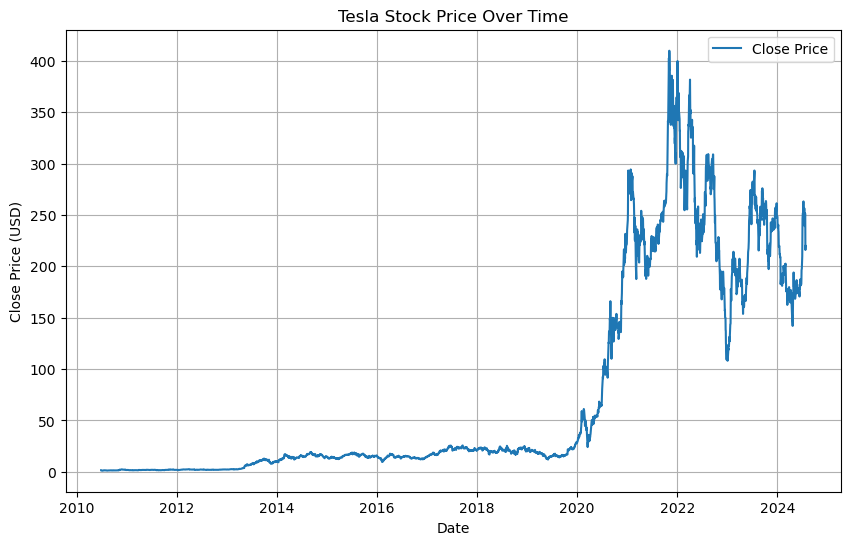

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index to have the Date column for plotting
tesla_data.reset_index(inplace=True)

# Plot the Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")


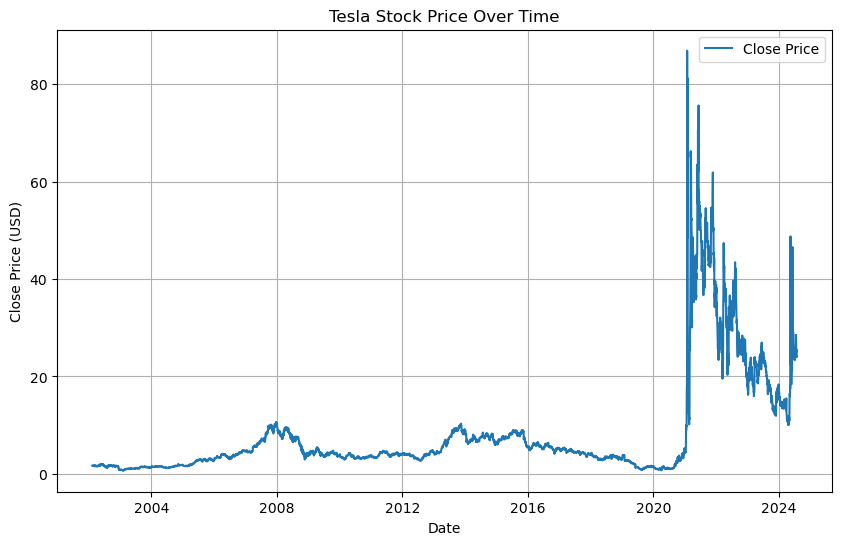

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract Tesla stock data
tesla = yf.Ticker("GME")
tesla_data = tesla.history(period="max")

# Reset the index to have the Date column for plotting
tesla_data.reset_index(inplace=True)

# Plot the Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")
